In [189]:
import pandas as pd
import numpy as np
import networkx as nx
import ast
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [345]:
artists = pd.read_csv('data_by_artist.csv')
artists = artists.drop_duplicates(subset='artist_name', keep='last')
artists[80:90]

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
80,Neil Young,379125,0.511677,0.397089,0.494641,126.167687,-12.942327,1,7,0.460809,0.046176,0.256286,0.037686,254191.5612,38.605442,294
81,Julie London,247966,0.425233,0.188913,0.275022,106.086712,-14.608791,1,10,0.815055,0.006661,0.164768,0.047037,156406.7842,21.181507,292
82,Los Tigres del Norte,806336,0.753952,0.518852,0.893810,123.423041,-9.289872,1,9,0.379285,0.000155,0.163390,0.118937,186968.8241,43.720690,290
83,Stan Getz,742899,0.501307,0.237282,0.523630,113.312850,-16.695554,1,5,0.877871,0.313541,0.163593,0.047590,305771.3937,21.557491,287
84,Green Day,154544,0.403968,0.898068,0.656616,138.006135,-4.260135,1,1,0.018499,0.020255,0.196684,0.071501,204988.3381,47.925267,281
85,Marty Robbins,858710,0.578662,0.339302,0.547685,114.574801,-11.804406,1,4,0.799804,0.008368,0.183821,0.040553,180774.1922,25.245552,281
86,Bill Evans,61912,0.484232,0.226042,0.356796,103.714032,-17.886479,1,0,0.879193,0.634696,0.135222,0.043088,310919.1286,25.903571,280
87,Bill Evans,74005,0.484232,0.226042,0.356796,103.714032,-17.886479,1,0,0.879193,0.634696,0.135222,0.043088,310919.1286,25.903571,280
88,Bill Evans,764702,0.484232,0.226042,0.356796,103.714032,-17.886479,1,0,0.879193,0.634696,0.135222,0.043088,310919.1286,25.903571,280
89,Bee Gees,43714,0.558565,0.510842,0.597418,107.119078,-11.204190,1,7,0.247674,0.046172,0.245669,0.039678,228251.3048,42.553903,269


In [129]:
years = pd.read_csv('data_by_year.csv')
years

,year,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity
0,1921,0.425661,0.236784,0.425495,100.397758,-17.095437,1,7,0.895823,0.322330,0.215814,0.077258,229911.9141,0.351562
1,1922,0.480000,0.237026,0.534056,101.376139,-19.179958,1,10,0.939236,0.440470,0.238647,0.115419,167904.5417,0.138889
2,1923,0.568462,0.246936,0.624788,112.456598,-14.373882,1,0,0.976329,0.401932,0.236656,0.098619,178356.3018,5.727811
3,1924,0.548654,0.347033,0.668574,120.653359,-14.202304,1,10,0.935575,0.583955,0.237875,0.090210,188461.6498,0.603376
4,1925,0.571890,0.264373,0.616430,115.671715,-14.516707,1,5,0.965422,0.408893,0.243094,0.115457,184130.6996,2.707224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,0.599976,0.592877,0.430769,119.070344,-7.949913,1,0,0.280290,0.074646,0.180198,0.107298,219400.7638,61.371254
96,2017,0.612286,0.586739,0.414465,116.840277,-8.422697,1,1,0.289916,0.098209,0.194218,0.111752,209343.6130,64.861500
97,2018,0.664930,0.590591,0.447141,122.004325,-7.253666,1,1,0.271941,0.035948,0.171781,0.128140,200919.1190,67.276000
98,2019,0.644215,0.578796,0.465856,118.868163,-8.041738,1,1,0.289298,0.076518,0.167161,0.124799,197733.1330,69.655500


In [ ]:
from tqdm import tqdm
#remove songs by artists that arent in the artists table
#duplicate songs w/ more than one artist
#takes my computer about a minute to run
#can ignore the warnings about setting a copy of a slice from a dataframe
full = pd.read_csv('full_music_data.csv')
allArtists = list(artists['artist_id'])
newdict = {}

full['artists_id'] = [int(x.split(',')[0][1:-1]) if len(x.split(',')) == 1 else [int(y) for y in x[1:-1].split(',')] for x in list(full['artists_id'])]
full['artist_names'] = [ast.literal_eval(x) if len(ast.literal_eval(x)) > 1 else ast.literal_eval(x)[0] for x in full['artist_names']]
floor = min(full['tempo'])
span = max(full['tempo']) - floor
full['tempo'] = [(x-floor)/span for x in full['tempo']]

last_id = 0
row = 0
for i in tqdm(range(len(full))): 
    thisRow = full.iloc[i,:]
    artIDs = thisRow['artists_id']
    artNames = thisRow['artist_names']
    
    if type(artIDs) == int:
        if artIDs == last_id: 
            thisRow['artists_id'] = artIDs
            thisRow['artist_names'] = artNames
            newdict[row] = thisRow.to_dict()
            row+=1
            last_id = artIDs
        else:
            if artIDs in allArtists:
                thisRow['artists_id'] = artIDs
                thisRow['artist_names'] = artNames
                newdict[row] = thisRow.to_dict()
                row+=1
                last_id = artIDs
                
    else:
        for j in range(len(artIDs)):
            artID = int(artIDs[j])
            artName = str(artNames[j])
            
            if artID in allArtists:
                thisRow['artists_id'] = artID
                thisRow['artist_names'] = artName
                newdict[row] = thisRow.to_dict()
                row+=1
    i+=1

full = pd.DataFrame.from_dict(newdict,'index')

artistGenres = {} #adds song genre to full
for i in tqdm(range(len(influence))):
    row = influence.iloc[i]
    influencer = row['influencer_id']
    follower = row['follower_id']
    infGenre = row['influencer_main_genre']
    folGenre = row['follower_main_genre']
    artistGenres[influencer] = infGenre
    artistGenres[follower] = folGenre

def getGenre(row):
    artist = row['artists_id']
    if type(artist) == list:
        print(row)
    try:
        genre = artistGenres[artist]
    except KeyError:
        genre = 'N/A'
    return genre

full['genre'] = full.apply(lambda row: getGenre(row), axis = 1)

full


  0%|                                                                                        | 0/98340 [00:00<?, ?it/s]C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [132]:
influence = pd.read_csv('influence_data.csv')
influence

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42765,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42767,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42768,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [7]:
names = []
for i in artists['artist_name']:
    names.append(i)
influence = influence[influence['influencer_name'].isin(names)]
influence = influence[influence['follower_name'].isin(names)]
influence = influence.reset_index(drop=True)
influence

,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,follower_id,follower_name,follower_main_genre,follower_active_start
0,759491,The Exploited,Pop/Rock,1980,74,Special Duties,Pop/Rock,1980
1,25462,Tricky,Electronic,1990,335,PJ Harvey,Pop/Rock,1990
2,66915,Bob Dylan,Pop/Rock,1960,335,PJ Harvey,Pop/Rock,1990
3,71209,Leonard Cohen,Pop/Rock,1950,335,PJ Harvey,Pop/Rock,1990
4,91438,The Gun Club,Pop/Rock,1980,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...
42747,580300,Sufjan Stevens,Pop/Rock,1990,3661738,Rosemary & Garlic,Pop/Rock,2010
42748,261309,Vybz Kartel,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010
42749,467203,Michael Jackson,R&B;,1960,3670556,Trinidad Cardona,R&B;,2010
42750,2518003,Popcaan,Reggae,2000,3670556,Trinidad Cardona,R&B;,2010


In [8]:
influenceGraph = nx.DiGraph()

In [9]:
i = 0
while i < len(influence):
    influencer = artists[artists['artist_name'] == influence['influencer_name'][i]]
    influencer = influencer[['energy','valence', 'key', 'acousticness', 'instrumentalness', 'speechiness']]
    v1 = influencer.to_numpy()
    follower = artists[artists['artist_name'] == influence['follower_name'][i]]
    follower = follower[['energy','valence', 'key', 'acousticness', 'instrumentalness', 'speechiness']]
    v2 = follower.to_numpy()
    weight = cosine_similarity(v1, v2) * 1000
    influenceGraph.add_edge(influence['influencer_name'][i], influence['follower_name'][i], weight = weight)
    i += 1

In [15]:
influenceGraph.nodes['Bob Dylan'].degree

AttributeError: 'dict' object has no attribute 'degree'

In [367]:
idDict = {}
for i in range(len(artists)):
    idDict[artists['artist_id'][i]] = artists['artist_name'][i]

influence = pd.read_csv('influence_data.csv')
iGraph = nx.DiGraph()
for artist in artists['artist_id']:
    iGraph.add_node(artist, weight = 0)
    
for i in range(len(influence)):
    influencer = influence["influencer_id"][i]
    follower = influence['follower_id'][i]
    
    iGraph.add_edge(influencer,follower)    

arts = []
artnames = []
scores = []
for node in iGraph.nodes():
    children = list(iGraph.successors(node))
    total = 0
    for child in children:
        total += iGraph.out_degree[child]
        
    iGraph.nodes[node]['weight'] = total
    arts.append(node)
    try:
        artnames.append(idDict[node])
    except KeyError:
        artnames.append('Unknown')
    scores.append(total)
    
   
totalInfluence = pd.DataFrame({'names':artnames, 'artists':arts, 'scores':scores})
totalInfluence = totalInfluence.sort_values(by=['scores'], ascending = False)
totalInfluence[:20]

,names,artists,scores
15,The Beatles,754032,11237
4,Bob Dylan,66915,7928
5,The Rolling Stones,894465,6341
137,Chuck Berry,120521,5897
7,Elvis Presley,180228,4749
210,The Velvet Underground,840402,4380
176,Little Richard,824022,4371
147,Jimi Hendrix,354105,4312
201,Hank Williams,549797,4134
35,The Kinks,100160,4067


In [134]:
totalInfluence = totalInfluence.reset_index(drop=True)
totalInfluence

,names,artists,scores
0,The Beatles,754032,11237
1,Bob Dylan,66915,7928
2,The Rolling Stones,894465,6341
3,Chuck Berry,120521,5897
4,Elvis Presley,180228,4749
...,...,...,...
5850,Wet Wet Wet,203765,0
5851,Des'ree,206668,0
5852,David Lindley,211146,0
5853,Vixen,222748,0


In [135]:
artistStyle = full.groupby(['artist_names']).mean() #some values dont make sense to average but w/e

songStats = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'speechiness']

for edge in list(iGraph.edges())[:100]: #could combine this w/weighted influence scores to see how much they actually influence
    inf = edge[0] #the musical style of the people theys upposedly influence 
    fol = edge[1]
    infstats = artistStyle[artistStyle['artists_id'] == inf][songStats]
    folstats = artistStyle[artistStyle['artists_id'] == fol][songStats]
    a = cosine_similarity(infstats, folstats)

since60 = full[full['year'] >= 1960]
since60.groupby(['year','genre']).mean()

[[0.91836107]]
[[0.96846749]]
[[0.99754292]]
[[0.94749496]]
[[0.97385075]]
[[0.6478513]]
[[0.9942241]]
[[0.74212613]]
[[0.98274307]]
[[0.86855959]]
[[0.99076241]]
[[0.95748195]]
[[0.90812649]]
[[0.80597076]]
[[0.98228294]]
[[0.84575681]]
[[0.98485552]]
[[0.99084487]]
[[0.95293218]]
[[0.99475058]]
[[0.96192202]]
[[0.96966828]]
[[0.90677015]]
[[0.99257806]]
[[0.80276329]]
[[0.96444635]]
[[0.91293176]]
[[0.99075153]]
[[0.98310733]]
[[0.98769665]]
[[0.76249751]]
[[0.96548011]]
[[0.94333997]]
[[0.98874487]]
[[0.92517966]]
[[0.99190568]]
[[0.99854997]]
[[0.97391353]]
[[0.96676866]]
[[0.88313195]]
[[0.96381149]]
[[0.97863503]]
[[0.94791865]]
[[0.99274143]]
[[0.92176934]]
[[0.97086445]]
[[0.98532605]]
[[0.73712951]]
[[0.99660343]]
[[0.98272712]]
[[0.96737333]]
[[0.91950685]]
[[0.96357615]]
[[0.901943]]
[[0.94282809]]
[[0.91479634]]
[[0.96625134]]
[[0.980177]]
[[0.9231327]]
[[0.99628188]]
[[0.95753862]]
[[0.99017597]]
[[0.79749341]]
[[0.99336569]]
[[0.99539963]]
[[0.94544705]]
[[0.84926009]]
[[

In [136]:
genre = []
for i in influence['influencer_main_genre']:
    if i not in genre:
        genre.append(i)
for i in influence['follower_main_genre']:
    if i not in genre:
        genre.append(i)
genre

['Pop/Rock',
 'Electronic',
 'Reggae',
 'Jazz',
 'Country',
 'Comedy/Spoken',
 'R&B;',
 'Classical',
 'Latin',
 'Vocal',
 'Folk',
 'Easy Listening',
 'International',
 'Avant-Garde',
 'Blues',
 'Stage & Screen',
 'New Age',
 'Religious',
 "Children's",
 'Unknown']

In [137]:
artistByGenre = {}
for i in genre:
    artistByGenre[i] = []
i = 0
while i < len(influence):
    genreList = artistByGenre.get(influence['influencer_main_genre'][i])
    genreListF = artistByGenre.get(influence['follower_main_genre'][i])
    if influence['influencer_name'][i] not in genreList:
        genreList.append(influence['influencer_name'][i])
    if influence['follower_name'][i] not in genreListF:
        genreListF.append(influence['follower_name'][i])
    i += 1

In [179]:
jazzSongs = full[full['artist_names'].isin(artistByGenre.get('Jazz'))]
jazzSongs = jazzSongs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
jazzMeans = jazzSongs.mean(axis=0)
jazzMeans = jazzMeans.to_numpy()

In [155]:
genreFeatures = []
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)
    means = means.to_numpy()
    genreFeatures.append(means)

In [171]:
i = 0
jazzsim = []
while i < len(genre):
    sim = cosine_similarity(jazzMeans.reshape(1, -1), genreFeatures[i].reshape(1, -1))
    jazzsim.append(sim[0][0])
    i += 1

In [173]:
d = {'Genre' : genre, 'Cosine Similarity' : jazzsim}
jazzSimilarity = pd.DataFrame(data=d)
jazzSimilarity = jazzSimilarity.sort_values(by=['Cosine Similarity'], ascending = False)
jazzSimilarity = jazzSimilarity.reset_index(drop=True)
jazzSimilarity

,Genre,Cosine Similarity
0,Jazz,1.000000
1,Avant-Garde,0.999892
2,Easy Listening,0.999821
3,Folk,0.999606
4,Stage & Screen,0.998424
5,Vocal,0.998347
6,Comedy/Spoken,0.997561
7,Classical,0.996964
8,New Age,0.996319
9,International,0.995279


In [202]:
for i in genre:
    songs = full[full['artist_names'].isin(artistByGenre.get(i))]
    songs = songs.drop(['artist_names', 'artists_id', 'explicit', 'duration_ms', 'popularity', 'year', 'release_date', 'song_title (censored)'], axis=1)
    means = songs.mean(axis=0)
    print(i)
    print(means['tempo'])

Pop/Rock
0.5041980713608971
Electronic
0.49042630707112583
Reggae
0.4774755289800211
Jazz
0.462278082020503
Country
0.4900360207138811
Comedy/Spoken
0.43481045095581794
R&B;
0.47720687330073297
Classical
0.4364707118746228
Latin
0.4904744919256894
Vocal
0.4515249429416114
Folk
0.4755359158889776
Easy Listening
0.4548916454260138
International
0.4750882932243574
Avant-Garde
0.45780935105224024
Blues
0.4824690364704632
Stage & Screen
0.4256400818155745
New Age
0.4554467713904153
Religious
0.4926720395705324
Children's
0.4874728923340553
Unknown
0.49486651100803203


In [182]:
RBSongs = full[full['artist_names'].isin(artistByGenre.get('R&B;'))]
RBSongs = RBSongs.sort_values(by='year')
RBSongs = RBSongs.reset_index(drop=True)
RBSongs

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored)
0,Aretha Franklin,927555,0.496,0.829,0.733,0.487597,-8.876,0,5,0.6290,0.076800,0.162,0.0519,0,161893,0,1927,1927,Evil **** ***** - Live
1,Screamin' Jay Hawkins,309458,0.845,0.455,0.896,0.356433,-13.668,0,5,0.7100,0.420000,0.055,0.0488,0,145933,2,1927,1927,I Put A Spell On You - Live
2,Chuck Willis,126144,0.556,0.476,0.730,0.700698,-6.766,1,10,0.9590,0.002400,0.242,0.0778,0,132733,0,1932,1932,Take It Like A Man (with The Royals)
3,Aretha Franklin,927555,0.648,0.356,0.529,0.355339,-13.917,0,7,0.8960,0.000036,0.110,0.0837,0,186160,3,1936,1936,It Ain't Necessarily So - from ***** and Bess
4,Babyface,61226,0.400,0.408,0.143,0.567764,-8.039,0,0,0.7710,0.013000,0.114,0.0286,0,287853,2,1941,1941,Strange Fruit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10954,Ashanti,933898,0.768,0.635,0.640,0.659557,-4.925,1,10,0.0289,0.000000,0.312,0.1500,1,215053,71,2020,4/17/2020,NASTY (feat. Ashanti & Megan Thee Stallion)
10955,Kehlani,3226468,0.824,0.503,0.784,0.448181,-6.940,0,6,0.0500,0.000053,0.107,0.1560,0,185419,67,2020,1/28/2020,Get Me
10956,Kehlani,3226468,0.832,0.508,0.750,0.447997,-6.913,0,6,0.0492,0.000054,0.107,0.1490,0,185427,71,2020,2/14/2020,Get Me (feat. Kehlani)
10957,The Weeknd,2674162,0.689,0.374,0.321,0.622637,-10.038,0,5,0.1150,0.000132,0.111,0.0851,1,144540,74,2020,4/3/2020,Missed You - Bonus Track


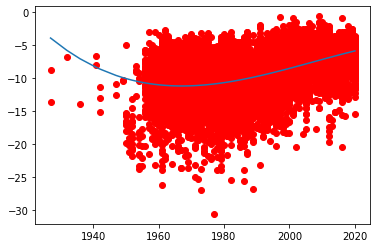

In [240]:
year = RBSongs['year']
loudness = RBSongs['loudness']
plt.plot(year, loudness, 'ro')
plt.plot(np.unique(year), np.poly1d(np.polyfit(year, loudness, 3))(np.unique(year)))

In [223]:
AGRoots = influence[['influencer_name', 'follower_main_genre']]
AGRoots = AGRoots[AGRoots['follower_main_genre'] == 'Avant-Garde']
AGRoots = pd.DataFrame(AGroots['influencer_name'].value_counts(ascending=False))
AGRoots = AGRoots.reset_index()
AGRoots = AGRoots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of AG Followers'})
AGRoots

,Influencer,Number of AG Followers
0,John Cage,6
1,Terry Riley,3
2,Philip Glass,2
3,Moondog,2
4,Brian Eno,2
5,Harold Budd,1
6,Maria Callas,1
7,Funkadelic,1
8,John Cale,1
9,Giorgio Moroder,1


In [225]:
ELroots = influence[['influencer_name', 'follower_main_genre']]
ELroots = ELroots[ELroots['follower_main_genre'] == 'Easy Listening']
ELroots = pd.DataFrame(ELroots['influencer_name'].value_counts(ascending=False))
ELroots = ELroots.reset_index()
ELroots = ELroots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of EL Followers'})
ELroots

,Influencer,Number of EL Followers
0,Les Baxter,4
1,Liberace,3
2,Martin Denny,3
3,AntÃ´nio Carlos Jobim,2
4,Percy Faith,2
5,George Shearing,2
6,Paul Weston,1
7,Melissa Etheridge,1
8,Billy Joel,1
9,Mannheim Steamroller,1


In [233]:
jazzRoots = influence[['influencer_name', 'follower_main_genre']]
jazzRoots = jazzRoots[jazzRoots['follower_main_genre'] == 'Jazz']
jazzRoots = pd.DataFrame(jazzRoots['influencer_name'].value_counts(ascending=False))
jazzRoots = jazzRoots.reset_index()
jazzRoots = jazzRoots.rename(columns={'index': 'Influencer', 'influencer_name': 'Number of Jazz Followers'})
jazzAGoverlap = jazzRoots[jazzRoots['Influencer'].isin(AGRoots['Influencer'])]
jazzELoverlap = jazzRoots[jazzRoots['Influencer'].isin(ELroots['Influencer'])]
jazzELoverlap

,Influencer,Number of Jazz Followers
0,Miles Davis,83
19,Erroll Garner,18
29,Stan Getz,13
79,George Shearing,7
107,Milt Jackson,5
121,AntÃ´nio Carlos Jobim,5
137,JoÃ£o Gilberto,4
150,The Beatles,4
175,Frank Sinatra,3
179,Artie Shaw,3


In [382]:
def diffGen(name):
    df = artists[artists['artist_name'] == name]
    df = df.drop(['artist_name', 'artist_id', 'duration_ms', 'popularity', 'count', 'mode', 'key', 'liveness'], axis=1)
    df = pd.DataFrame(df.mean(axis=0))
    df = df.reset_index()
    df = df.rename(columns={'index': 'Characteristic', 0: 'Mean'})
    ID = artists.loc[artists['artist_name'] == name, 'artist_id']
    ID = list(ID)
    i = 0
    length = 0
    while length < 1:
        length = len(list(iGraph.successors(int(ID[i]))))
        if length > 0:
            break
        i += 1
    f = artists[artists['artist_id'].isin(list(iGraph.successors(int(ID[i]))))]
    f = f.drop(['artist_name', 'artist_id', 'duration_ms', 'popularity', 'count', 'mode', 'key', 'liveness'], axis=1)
    f = pd.DataFrame(f.mean(axis=0))
    f = f.reset_index()
    f = f.rename(columns={'index': 'Characteristic', 0: 'Mean'})
    df['Difference in %'] = abs((df['Mean'] - f['Mean'])/df['Mean']) * 100
    return df

In [383]:
diffGen('Bill Evans')

,Characteristic,Mean,Difference in %
0,danceability,0.484232,0.134213
1,energy,0.226042,55.938216
2,valence,0.356796,13.263597
3,tempo,103.714032,10.814538
4,loudness,-17.886479,12.638057
5,acousticness,0.879193,25.054025
6,instrumentalness,0.634696,23.519497
7,speechiness,0.043088,5.103842


In [317]:
jazzRoots[1:20]

,Influencer,Number of Jazz Followers
1,Charlie Parker,78
2,John Coltrane,66
3,Dizzy Gillespie,46
4,Lester Young,45
5,Thelonious Monk,39
6,Bud Powell,37
7,Ornette Coleman,29
8,Sonny Rollins,28
9,Horace Silver,27
10,Art Blakey,26


In [310]:
diffGen('Miles Davis')

,Characteristic,Mean,Difference in %
0,danceability,0.460221,10.526189
1,energy,0.308229,53.177014
2,valence,0.417860,20.194747
3,tempo,113.550382,0.528045
4,loudness,-14.526619,9.457358
5,acousticness,0.655711,25.706516
6,instrumentalness,0.205073,59.418083
7,speechiness,0.054571,15.638073


In [311]:
diffGen('Charlie Parker')

,Characteristic,Mean,Difference in %
0,danceability,0.492745,6.551321
1,energy,0.429547,4.825967
2,valence,0.618057,12.988605
3,tempo,117.159090,3.162469
4,loudness,-10.881240,24.965173
5,acousticness,0.797565,21.530788
6,instrumentalness,0.182118,64.498780
7,speechiness,0.078022,5.081028


In [312]:
diffGen('John Coltrane')

,Characteristic,Mean,Difference in %
0,danceability,0.460081,6.585320
1,energy,0.356163,38.012587
2,valence,0.432656,16.580173
3,tempo,116.364769,0.000863
4,loudness,-13.197543,3.455196
5,acousticness,0.681217,30.062327
6,instrumentalness,0.145599,122.402383
7,speechiness,0.053308,10.628666


In [346]:
artists[artists['artist_name'] == 'Madonna']

,artist_name,artist_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,popularity,count
118,Madonna,237205,0.691415,0.668088,0.6425,116.614534,-9.514936,1,0,0.221493,0.050594,0.136962,0.047975,286653.2542,47.444915,236
120,Madonna,1482685,0.691415,0.668088,0.6425,116.614534,-9.514936,1,0,0.221493,0.050594,0.136962,0.047975,286653.2542,47.444915,236


In [ ]:
##danceability seems to be contagious for Jazz specifically, along with Tempo.

In [384]:
average = diffGen('Miles Davis')
average['All Jazz'] = average['Difference in %']
for i in jazzRoots['Influencer']:
    #print(i)
    df = diffGen(i)
    #print(df)
    average['All Jazz'] = average['All Jazz'] + df['Difference in %']
average['All Jazz'] = average['All Jazz']/len(jazzRoots)
average

,Characteristic,Mean,Difference in %,All Jazz
0,danceability,0.460221,10.526189,17.572490
1,energy,0.308229,53.177014,62.175926
2,valence,0.417860,20.194747,34.530507
3,tempo,113.550382,0.528045,10.050108
4,loudness,-14.526619,9.457358,21.005121
5,acousticness,0.655711,25.706516,298.464444
6,instrumentalness,0.205073,59.418083,inf
7,speechiness,0.054571,15.638073,36.265284
